<a href="https://colab.research.google.com/github/Thilak21/Titanic-survival-prediction/blob/main/notebook/titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score

Models

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Load Dataset

In [5]:
from pathlib import Path
path = Path("/content/drive/MyDrive/data")

In [8]:
train_df = pd.read_csv(path/"train.csv")
test_df = pd.read_csv(path/"test.csv")
print("Train Shape:", train_df.shape)
print("Test Shape:", test_df.shape)
train_df.head()

Train Shape: (891, 12)
Test Shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Exploratiry Data Analysis

In [ ]:
train_df.info()
train_df.describe()
train_df.isnull().sum()

Target Distribution

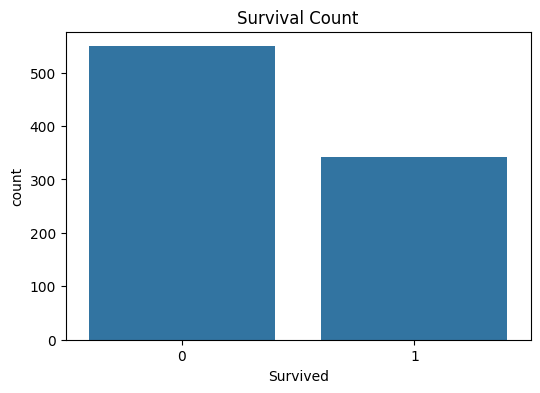

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=train_df)
plt.title("Survival Count")
plt.show()


Survival by Gender

<function matplotlib.pyplot.show(close=None, block=None)>

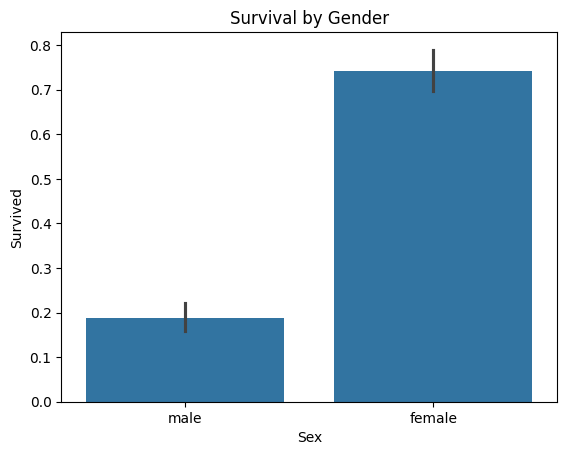

In [10]:
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title("Survival by Gender")
plt.show

Survival by Passenger Class

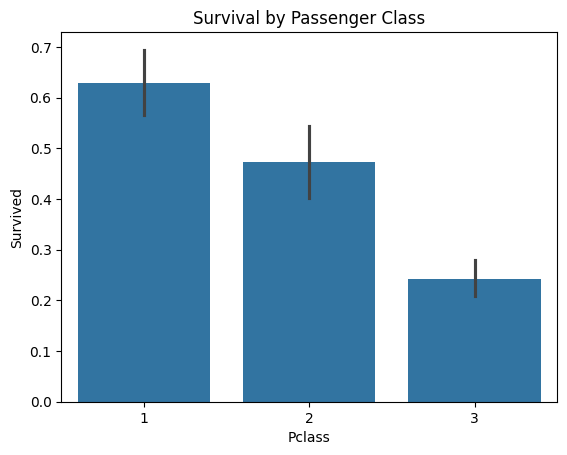

In [11]:
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title("Survival by Passenger Class")
plt.show()

Age Distribution

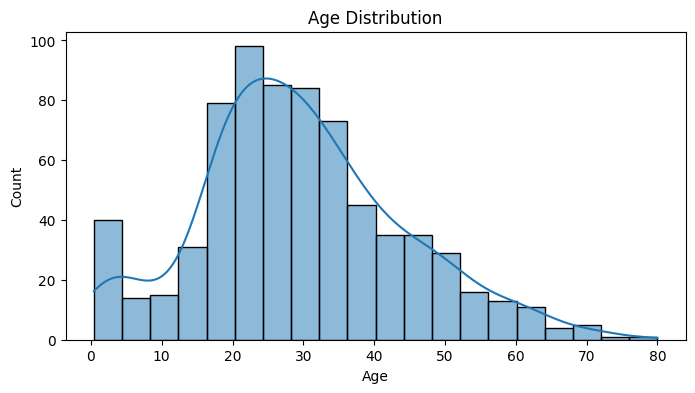

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(train_df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()


Data Preprocessing

In [ ]:
test_ids = test_df['PassengerId']
full_df = pd.concat([train_df, test_df], sort=False)
full_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Handle Missing Values

In [ ]:
full_df['Age'] = full_df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))
full_df['Embarked'].fillna(full_df['Embarked'].mode()[0], inplace=True)
full_df['Fare'].fillna(full_df['Fare'].median(), inplace=True)
full_df.drop('Cabin', axis=1, inplace=True, errors='ignore')
full_df

/tmp/ipython-input-1594434333.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_df['Embarked'].fillna(full_df['Embarked'].mode()[0], inplace=True)
/tmp/ipython-input-1594434333.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,S


Feature Engineering

Family size & Isalone

In [ ]:
full_df['FamilySize'] = full_df['SibSp'] + full_df['Parch'] + 1
full_df['IsAlone'] = 0
full_df.loc[full_df['FamilySize'] == 1, 'IsAlone'] = 1
full_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,S,1,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,1,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,1,1
416,1308,NaN,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,S,1,1


Age group

In [ ]:
full_df['AgeGroup'] = pd.cut(full_df['Age'], bins=[0,12,20,40,60,80],labels=['Child','Teen','Adult','MidAge','Senior'])
full_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone,AgeGroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,Adult
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,Adult
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,Adult
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,Adult
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,S,1,1,Adult
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,1,1,Adult
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,1,1,Adult
416,1308,NaN,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,S,1,1,Adult


Extract Title from name

In [ ]:
full_df['Title'] = full_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
rare_titles = ['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major','Rev', 'Sir', 'Jonkheer', 'Dona']
full_df['Title'] = full_df['Title'].replace(rare_titles, 'Rare')
full_df['Title'] = full_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
full_df['Title'] = full_df['Title'].replace('Mme', 'Mrs')
full_df

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-1331780028.py:1: SyntaxWarning: invalid escape sequence '\.'
  full_df['Title'] = full_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone,AgeGroup,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,Adult,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,Adult,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,Adult,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,Adult,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,Adult,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,S,1,1,Adult,Mr
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,1,1,Adult,Rare
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,1,1,Adult,Mr
416,1308,NaN,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,S,1,1,Adult,Mr


Drop Unneccessary Columns

In [ ]:
full_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
full_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,AgeGroup,Title
0,0.0,3,male,22.0,1,0,7.2500,S,2,0,Adult,Mr
1,1.0,1,female,38.0,1,0,71.2833,C,2,0,Adult,Mrs
2,1.0,3,female,26.0,0,0,7.9250,S,1,1,Adult,Miss
3,1.0,1,female,35.0,1,0,53.1000,S,2,0,Adult,Mrs
4,0.0,3,male,35.0,0,0,8.0500,S,1,1,Adult,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,male,24.0,0,0,8.0500,S,1,1,Adult,Mr
414,NaN,1,female,39.0,0,0,108.9000,C,1,1,Adult,Rare
415,NaN,3,male,38.5,0,0,7.2500,S,1,1,Adult,Mr
416,NaN,3,male,24.0,0,0,8.0500,S,1,1,Adult,Mr


Encode Categorical Variable

In [ ]:
full_df = pd.get_dummies(full_df, drop_first=True)
full_df

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_MidAge,AgeGroup_Senior,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0.0,3,22.0,1,0,7.2500,2,0,True,False,True,False,True,False,False,False,True,False,False
1,1.0,1,38.0,1,0,71.2833,2,0,False,False,False,False,True,False,False,False,False,True,False
2,1.0,3,26.0,0,0,7.9250,1,1,False,False,True,False,True,False,False,True,False,False,False
3,1.0,1,35.0,1,0,53.1000,2,0,False,False,True,False,True,False,False,False,False,True,False
4,0.0,3,35.0,0,0,8.0500,1,1,True,False,True,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,24.0,0,0,8.0500,1,1,True,False,True,False,True,False,False,False,True,False,False
414,NaN,1,39.0,0,0,108.9000,1,1,False,False,False,False,True,False,False,False,False,False,True
415,NaN,3,38.5,0,0,7.2500,1,1,True,False,True,False,True,False,False,False,True,False,False
416,NaN,3,24.0,0,0,8.0500,1,1,True,False,True,False,True,False,False,False,True,False,False


Split Train & Test

In [ ]:
train_processed = full_df[full_df['Survived'].notnull()]
test_processed = full_df[full_df['Survived'].isnull()]

x = train_processed.drop('Survived', axis=1)
y = train_processed['Survived']

test_final = test_processed.drop('Survived', axis=1)

Train-Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)


Model 1 : Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8324022346368715
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87       110
         1.0       0.81      0.74      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



Model 2 : Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       110
         1.0       0.77      0.77      0.77        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



Cross Validation

In [ ]:
lr_cv = cross_val_score(lr, x, y, cv=5)
print('Logistic Regression Cross Validation Accuracy:', lr_cv.mean())

Logistic Regression Cross Validation Accuracy: 0.8226727763480008


In [ ]:
rf_cv = cross_val_score(rf, x, y, cv=5)
print('Random Forest Cross Validation Accuracy:', rf_cv.mean())


Random Forest Cross Validation Accuracy: 0.8035653756826313


In [ ]:
print("LR Train Accuracy:", lr.score(x_train, y_train))
print("LR Test Accuracy:", lr.score(x_test, y_test))

print("RF Train Accuracy:", rf.score(x_train,y_train))
print("RF Test Accuracy:", rf.score(x_test,y_test))


LR Train Accuracy: 0.8286516853932584
LR Test Accuracy: 0.8324022346368715
RF Train Accuracy: 0.9845505617977528
RF Test Accuracy: 0.8212290502793296


Confusion Matrix

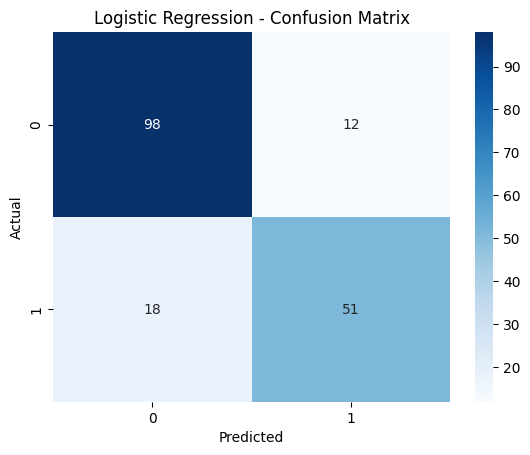

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Final Model Training

In [ ]:
lr.fit(x,y)
final_pred = lr.predict(test_final)

Create Submission file

In [ ]:
submission = pd.DataFrame({'PassengerId': test_ids, 'Survived': final_pred.astype(int)})
submission.to_csv('submission.csv', index=False)
print('Submission file created successfully')


Submission file created successfully


Logistic Regression achieved 82% accuracy while Random Forest achieved 80%. The better performance of Logistic Regression suggests that the Titanic dataset has mostly lineaar relationship between features and the target variable.Random Forest showed slightly higher training accuracy but lower test accuracy, indicating minor overfitting.Since the dataset is relatively small,simpler models generalize better.